In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot
import cufflinks as cf
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
pd.set_option("max_columns", None)
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

PALETTE = sns.color_palette("Set2")


In [2]:
data=pd.read_csv('/Users/carrie/IronHack/Final_Project/Encoded_Data/data_encode.csv').iloc[:,1:]
data

Education  Marital_Status  Yearly_Income  Recency_(days)  Wines  Fruits  \
0             0               3        58138.0              58    635      88   
1             0               3        46344.0              38     11       1   
2             0               0        71613.0              26    426      49   
3             0               0        26646.0              26     11       4   
4             2               2        58293.0              94    173      43   
...         ...             ...            ...             ...    ...     ...   
2231          0               2        61223.0              46    709      43   
2232          2               0        64014.0              56    406       0   
2233          0               1        56981.0              91    908      48   
2234          1               0        69245.0               8    428      30   
2235          2               2        52869.0              40     84       3   

      Meat  Fish  Sweets  Gold  Discount_Deal  Web_Deal  Catalog_Deal  \
0      546   172      88    88              3         8            10   
1        6     2       1     6              2         1             1   
2      127   111      21    42              1         8             2   
3       20    10       3     5              2         2             0   
4      118    46      27    15              5         5             3   
...    ...   ...     ...   ...            ...       ...           ...   
2231   182    42     118   247              2         9             3   
2232    30     0       0     8              7         8             2   
2233   217    32      12    24              1         2             3   
2234   214    80      30    61              2         6             5   
2235    61     2       1    21              3         3             1   

      Store_Deal  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0              4                  7             0             0             0   
1              2                  5             0             0             0   
2             10                  4             0             0             0   
3              4                  6             0             0             0   
4              6                  5             0             0             0   
...          ...                ...           ...           ...           ...   
2231           4                  5             0             0             0   
2232           5                  7             0             0             0   
2233          13                  6             0             1             0   
2234          10                  3             0             0             0   
2235           4                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                0             0         0         1   57   
1                0             0         0         0   60   
2                0             0         0         0   49   
3                0             0         0         0   30   
4                0             0         0         0   33   
...            ...           ...       ...       ...  ...   
2231             0             0         0         0   47   
2232             1             0         0         0   68   
2233             0             0         0         0   33   
2234             0             0         0         0   58   
2235             0             0         0         1   60   

      Client_since_(month)  Spending  Total_Deal_nondiscount  Children  \
0                     33.2      1617                      22         0   
1                      5.0        27                       4         2   
2                     16.6       776                      20         0   
3                      3.0        53                       6         1   
4                     11.5       422                      14         1   
...   

In [3]:
# first clustering: cluster clients by spending and yearly income 

# Scale my data

In [4]:
df = data.copy()

scaler = StandardScaler()
scaler.fit(df)
scaled_data = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled_data

Education  Marital_Status  Yearly_Income  Recency_(days)     Wines  \
0     -0.869141        1.222432       0.288195        0.306856  0.983228   
1     -0.869141        1.222432      -0.262715       -0.383971 -0.871064   
2     -0.869141       -1.457331       0.917627       -0.798467  0.362159   
3     -0.869141       -1.457331      -1.182829       -0.798467 -0.871064   
4      0.977319        0.329178       0.295435        1.550344 -0.389661   
...         ...             ...            ...             ...       ...   
2231  -0.869141        0.329178       0.432299       -0.107640  1.203128   
2232   0.977319       -1.457331       0.562669        0.237773  0.302727   
2233  -0.869141       -0.564077       0.234150        1.446720  1.794481   
2234   0.054089       -1.457331       0.807015       -1.420212  0.368102   
2235   0.977319        0.329178       0.042075       -0.314889 -0.654136   

        Fruits      Meat      Fish    Sweets      Gold  Discount_Deal  \
0     1.554170  1.679746  2.461068  1.475396  0.845669       0.348738   
1    -0.636431 -0.713455 -0.650414 -0.631638 -0.729742      -0.168700   
2     0.572177 -0.177201  1.344595 -0.147262 -0.038098      -0.686137   
3    -0.560893 -0.651409 -0.503991 -0.583200 -0.748954      -0.168700   
4     0.421101 -0.217088  0.154911 -0.001950 -0.556831       1.383614   
...        ...       ...       ...       ...       ...            ...   
2231  0.421101  0.066551  0.081700  2.201960  3.900428      -0.168700   
2232 -0.661610 -0.607091 -0.687019 -0.655857 -0.691317       2.418490   
2233  0.546997  0.221666 -0.101329 -0.365231 -0.383920      -0.686137   
2234  0.093769  0.208371  0.777208  0.070707  0.326936      -0.168700   
2235 -0.586072 -0.469703 -0.650414 -0.631638 -0.441557       0.348738   

      Web_Deal  Catalog_Deal  Store_Deal  NumWebVisitsMonth  AcceptedCmp3  \
0     1.407639      2.509801   -0.552429           0.692865      -0.28041   
1    -1.110921     -0.568970   -1.167738          -0.131421      -0.28041   
2     1.407639     -0.226884    1.293496          -0.543564      -0.28041   
3    -0.751127     -0.911056   -0.552429           0.280722      -0.28041   
4     0.328256      0.115201    0.062879          -0.131421      -0.28041   
...        ...           ...         ...                ...           ...   
2231  1.767433      0.115201   -0.552429          -0.131421      -0.28041   
2232  1.407639     -0.226884   -0.244775           0.692865      -0.28041   
2233 -0.751127      0.115201    2.216459           0.280722      -0.28041   
2234  0.688050      0.799373    1.293496          -0.955707      -0.28041   
2235 -0.391333     -0.568970   -0.552429           0.692865      -0.28041   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
1        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
2        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
3        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
4        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
...            ...           ...           ...           ...       ...   
2231     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
2232     -0.284104     -0.279482      3.811532     -0.116616 -0.095001   
2233      3.519833     -0.279482     -0.262362     -0.116616 -0.095001   
2234     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
2235     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   

      Response       Age  Client_since_(month)  Spending  \
0     2.386338  1.016868              1.975387  1.680176   
1    -0.419052  1.273264             -1.666842 -0.962202   
2    -0.419052  0.333146             -0.168620  0.282541   
3    -0.419052 -1.290693             -1.925156 -0.918994   
4    -0.419052 -1.034298             -0.827321 -0.305762   
...        ...       ...                  

# 1st cluster by income & spending using KMEANS

In [5]:
df1 = data[['Yearly_Income','Spending']]

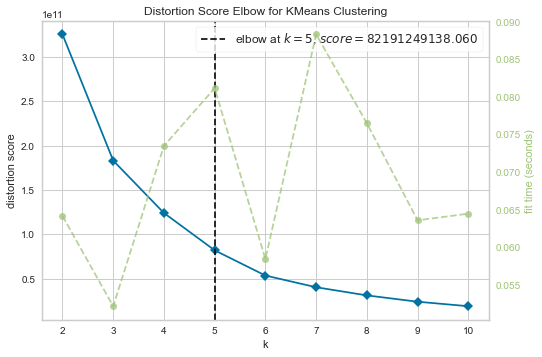

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(df1)
elbow_method.show()
# it shown that when K=4, the cluster is the most optimal

In [7]:
model = KMeans(n_clusters=4).fit(df1)
df['cluster_income_spending'] = model.predict(df1)+1
df['cluster_income_spending'].value_counts()

1    670
2    668
3    455
4    443
Name: cluster_income_spending, dtype: int64

In [8]:
pred1 = model.fit_predict(df1)
score1 = silhouette_score(df1, pred1)
score1

0.5253410829717181

In [9]:
clst1_freq = df[['cluster_income_spending','Yearly_Income']].groupby('cluster_income_spending').agg('count')
clst1_freq=clst1_freq.rename(columns={'Yearly_Income':'Frequency'})
clst1_freq

Frequency
cluster_income_spending           
1                              670
2                              668
3                              455
4                              443

In [10]:
fig = px.bar(clst1_freq, x=clst1_freq.index, y=clst1_freq['Frequency'], barmode='group')
fig.show()

In [11]:
fig = px.scatter(df, x="Yearly_Income", y="Spending", color='cluster_income_spending',size='Spending', width=800, height=800)
fig.show()

<Figure size 1008x576 with 0 Axes>

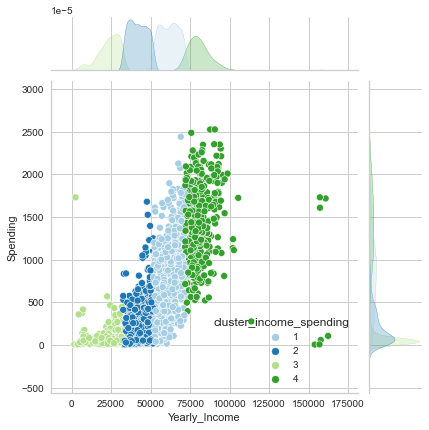

In [12]:
plt.figure(figsize=(14,8))
sns.jointplot(x=df["Yearly_Income"], y=df["Spending"], hue=df["cluster_income_spending"],palette=sns.color_palette('Paired', n_colors=4))

In [13]:
#Group 1: low spend - high income
#Group 2: high spend - high income
#Group 3: low spend - low income
#Group 4: low spend - avg income

In [14]:
cat_clust =df[['cluster_income_spending','Wines','Meat','Fish','Fruits','Sweets','Gold']].groupby('cluster_income_spending',as_index=False).agg('mean')
cat_clust

cluster_income_spending       Wines        Meat       Fish     Fruits  \
0                        1  455.820896  187.834328  46.188060  34.091045   
1                        2  116.211078   48.275449  13.170659   8.005988   
2                        3   17.145055   20.817582   7.993407   5.520879   
3                        4  652.819413  464.573363  91.534989  63.322799   

      Sweets       Gold  
0  33.622388  60.671642  
1   8.176647  26.946108  
2   5.738462  16.250549  
3  67.611738  72.916479

In [15]:
fig = px.bar(cat_clust, x='cluster_income_spending', y=['Wines','Meat','Fish','Fruits','Sweets','Gold'], title="avg catogories spending per cluster")
fig.show()

# for Wine & Meat, cluster 2 spent the most in average, then cluster 4

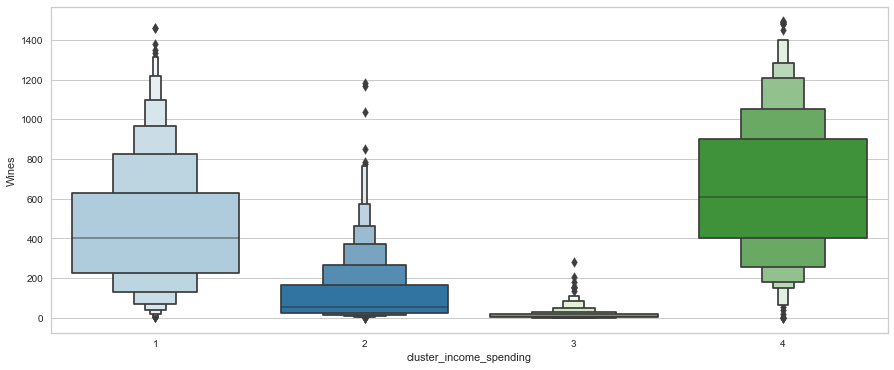

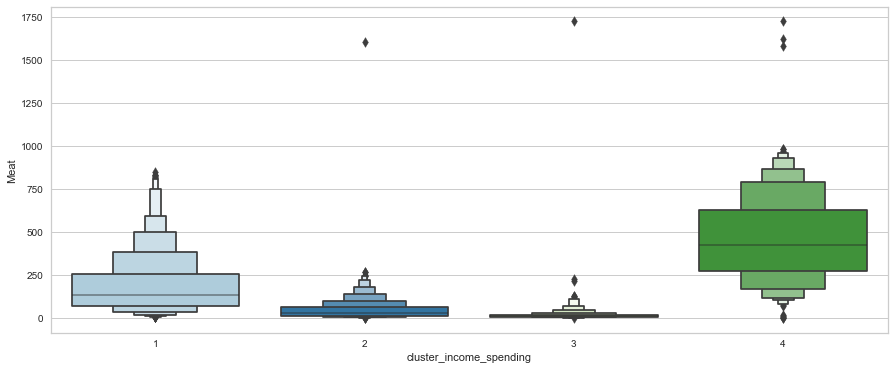

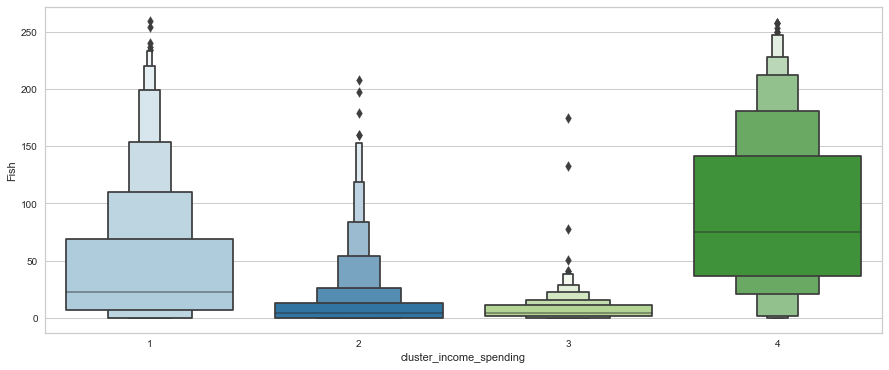

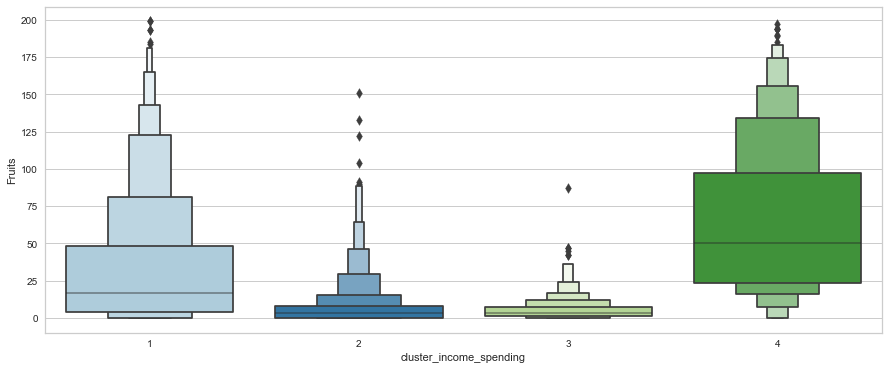

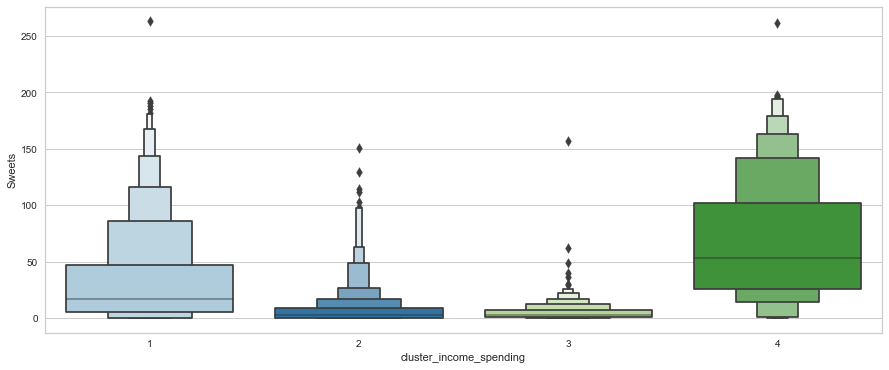

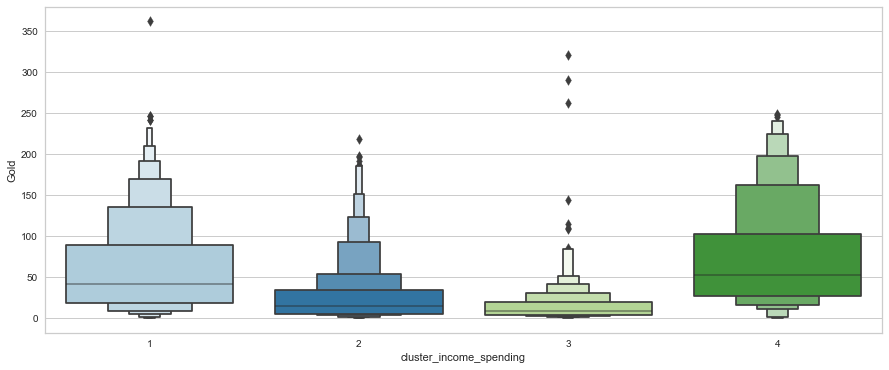

In [16]:
cat = ['Wines','Meat','Fish','Fruits','Sweets','Gold']

for i in cat:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x="cluster_income_spending", y=i,data=df, palette="Paired")

# gold: cluster 2 & 4 have almost the same spending 


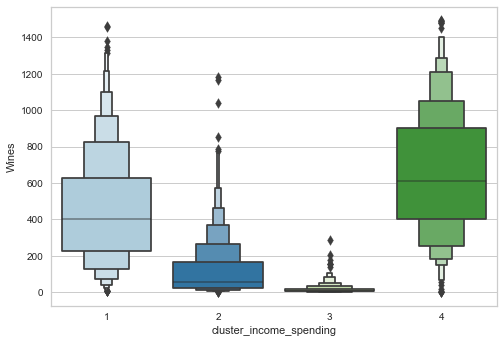

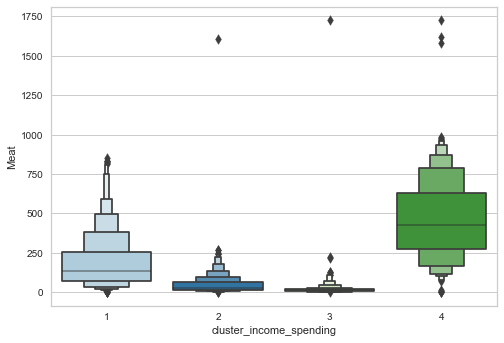

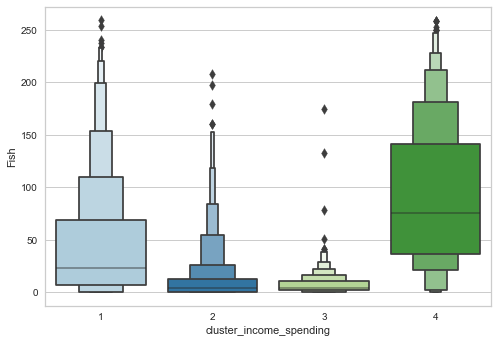

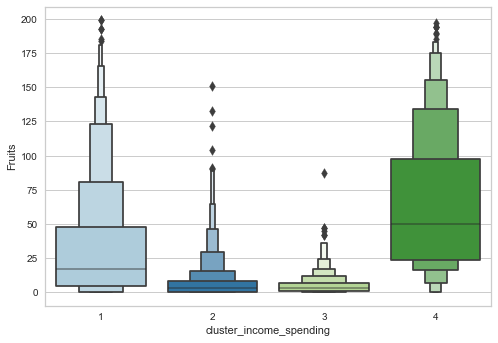

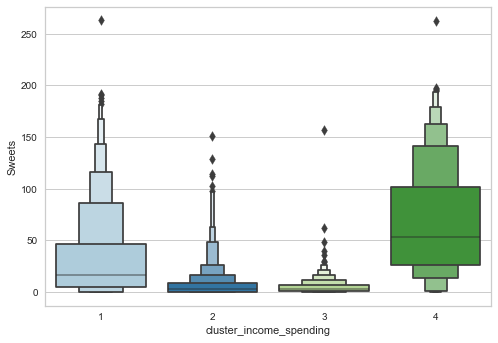

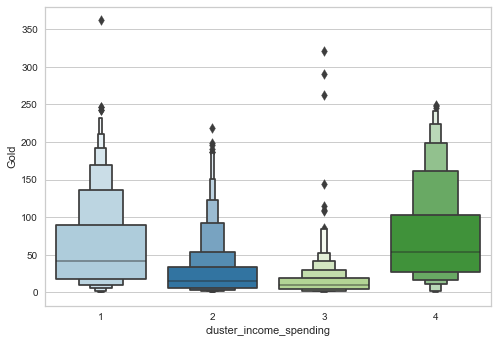

In [17]:
cat = ['Wines','Meat','Fish','Fruits','Sweets','Gold']

for i in cat:
    sns.boxenplot(x="cluster_income_spending", y=i,data=df, palette="Paired")
    plt.show()

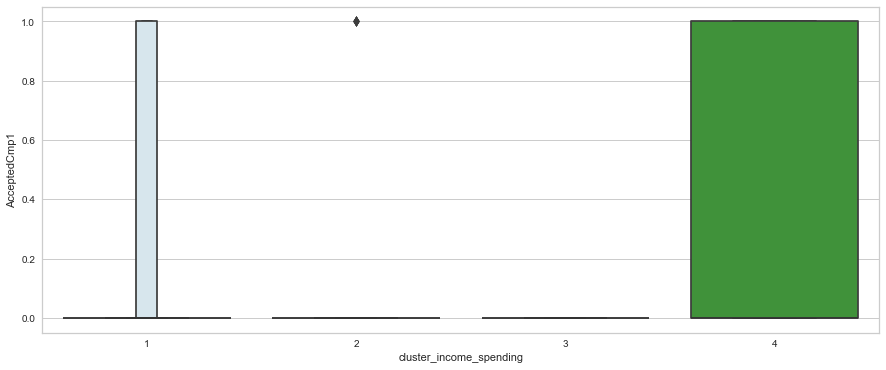

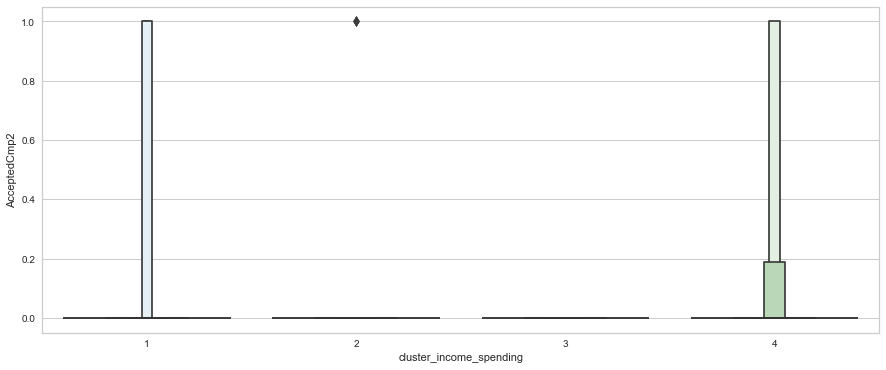

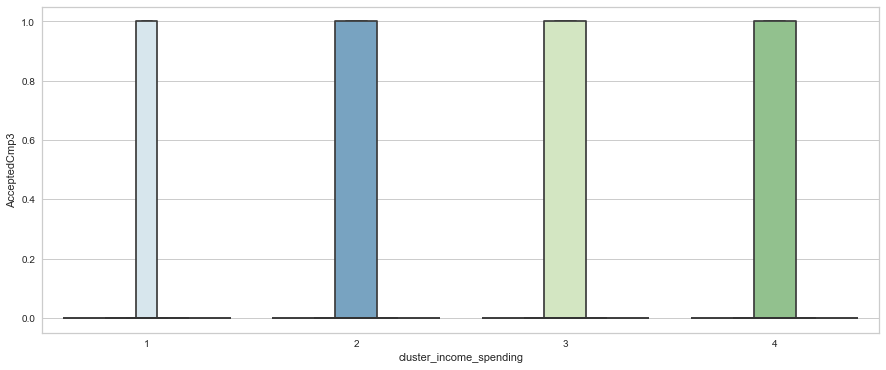

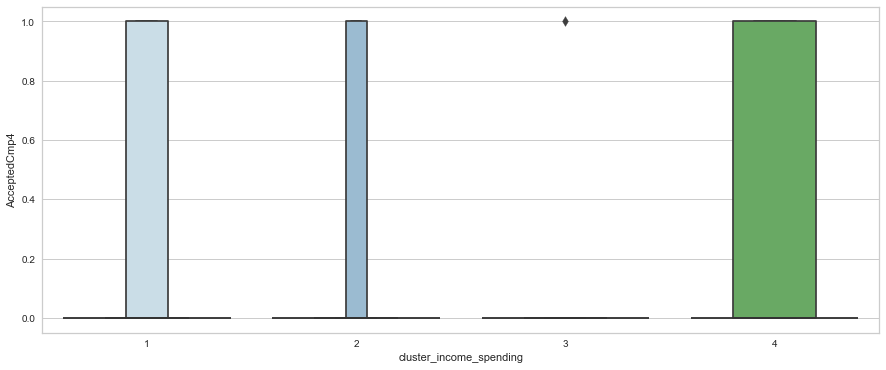

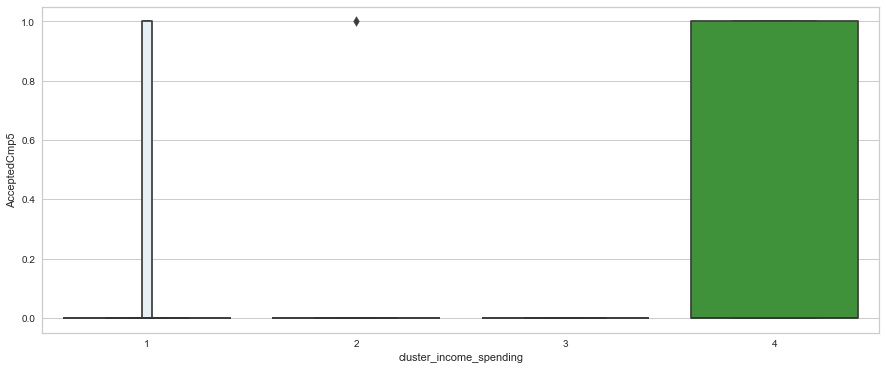

In [18]:
camp = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
for i in camp:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x="cluster_income_spending", y=i,data=df, palette="Paired")

# group 1&3 not quite accepted campaignes given this way of clustering
# camp 3 is more accepted by all clusters
# camp 1 & 4 workd very well for cluster 2

In [19]:
#clst1_total_camp = df[['cluster_income_spending','total_cmp_accepted','Yearly_Income']].groupby(['cluster_income_spending','total_cmp_accepted']).agg('count')
clst1_total_camp = df[['cluster_income_spending','total_cmp_accepted','Yearly_Income']].pivot_table(index='cluster_income_spending', columns='total_cmp_accepted', values='Yearly_Income', aggfunc='count')
clst1_camp=clst1_total_camp.rename(columns={'Yearly_Income':'freq'})
clst1_camp

total_cmp_accepted           0      1     2     3     4
cluster_income_spending                                
1                        543.0  104.0  18.0   4.0   1.0
2                        586.0   74.0   7.0   1.0   NaN
3                        418.0   37.0   NaN   NaN   NaN
4                        227.0  109.0  58.0  39.0  10.0

Text(0, 0.5, 'frequency')

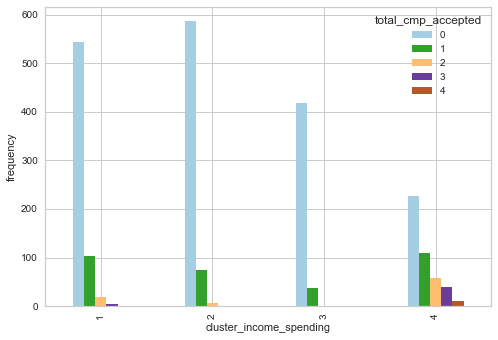

In [20]:
clst1_camp.plot(kind='bar',cmap=sns.color_palette("Paired", as_cmap=True))

plt.ylabel('frequency')
#no obvious pattern found given this way of clustering, too few clients accpted the campaigne

In [21]:
clst1_deals1 = df[['cluster_income_spending','Discount_Deal']].groupby('cluster_income_spending').agg('mean')
clst1_deals2 = df[['cluster_income_spending','Total_Deal_nondiscount']].groupby('cluster_income_spending').agg('mean')

result = pd.concat([clst1_deals1, clst1_deals2], axis=1)
result
#clst1_deals = df[['cluster_income_spending','Discount_Deal','Total_Deal_nondiscount']].groupby('cluster_income_spending').agg('count')

Discount_Deal  Total_Deal_nondiscount
cluster_income_spending                                       
1                             2.856716               17.008955
2                             2.664671                8.434132
3                             2.032967                5.290110
4                             1.313770               19.451467

<Figure size 576x396 with 0 Axes>

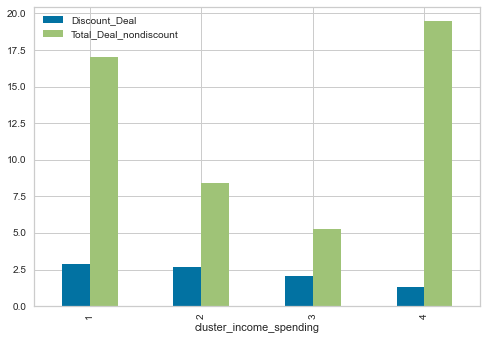

In [22]:
sns.color_palette("Paired", as_cmap=True)
plt.figure()
result.plot(kind='bar')
plt.show()

In [23]:
#sns.barplot(data=df, x='Education',y='Marital_Status',hue='cluster_income_spending')
# no obvious finding about their marital status & education

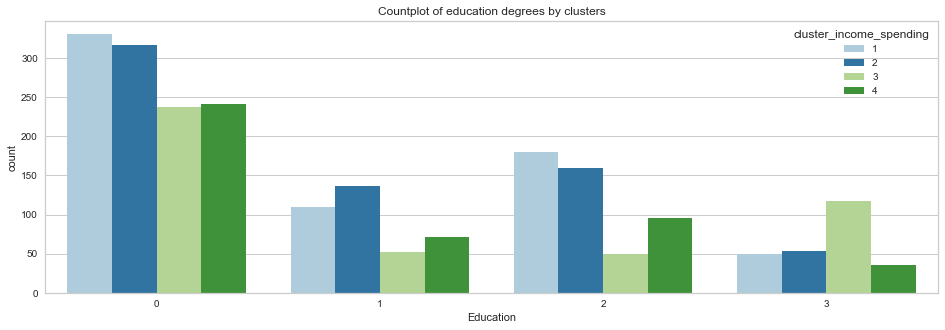

In [24]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')

sns.countplot(data=df, x='Education', hue='cluster_income_spending',palette=sns.color_palette('Paired', n_colors=4))

plt.show()

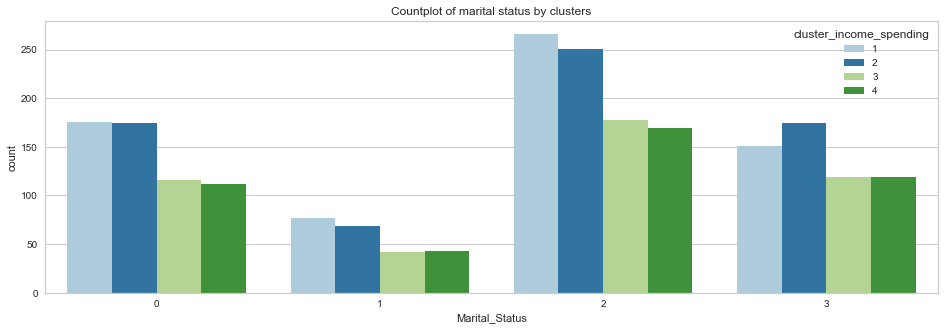

In [25]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of marital status by clusters')
sns.countplot(data=df, x='Marital_Status', hue='cluster_income_spending',palette=sns.color_palette('Paired', n_colors=4))
plt.show()

# 2nd cluster by PCA on people & product & place cols

In [26]:
df.columns

Index(['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Discount_Deal',
       'Web_Deal', 'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Client_since_(month)',
       'Spending', 'Total_Deal_nondiscount', 'Children', 'total_cmp_accepted',
       'cluster_income_spending'],
      dtype='object')

In [27]:
df2 = df[['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 
       'Web_Deal', 'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Client_since_(month)',
       'Spending', 'Total_Deal_nondiscount', 'Children']]
df2

Education  Marital_Status  Yearly_Income  Recency_(days)  Wines  Fruits  \
0             0               3        58138.0              58    635      88   
1             0               3        46344.0              38     11       1   
2             0               0        71613.0              26    426      49   
3             0               0        26646.0              26     11       4   
4             2               2        58293.0              94    173      43   
...         ...             ...            ...             ...    ...     ...   
2231          0               2        61223.0              46    709      43   
2232          2               0        64014.0              56    406       0   
2233          0               1        56981.0              91    908      48   
2234          1               0        69245.0               8    428      30   
2235          2               2        52869.0              40     84       3   

      Meat  Fish  Sweets  Gold  Web_Deal  Catalog_Deal  Store_Deal  \
0      546   172      88    88         8            10           4   
1        6     2       1     6         1             1           2   
2      127   111      21    42         8             2          10   
3       20    10       3     5         2             0           4   
4      118    46      27    15         5             3           6   
...    ...   ...     ...   ...       ...           ...         ...   
2231   182    42     118   247         9             3           4   
2232    30     0       0     8         8             2           5   
2233   217    32      12    24         2             3          13   
2234   214    80      30    61         6             5          10   
2235    61     2       1    21         3             1           4   

      NumWebVisitsMonth  Complain  Response  Age  Client_since_(month)  \
0                     7         0         1   57                  33.2   
1                     5         0         0   60                   5.0   
2                     4         0         0   49                  16.6   
3                     6         0         0   30                   3.0   
4                     5         0         0   33                  11.5   
...                 ...       ...       ...  ...                   ...   
2231                  5         0         0   47                  18.9   
2232                  7         0         0   68                   2.9   
2233                  6         0         0   33                  11.3   
2234                  3         0         0   58                  11.4   
2235                  7         0         1   60                  26.9   

      Spending  Total_Deal_nondiscount  Children  
0         1617                      22         0  
1           27                       4         2  
2          776                      20         0  
3           53                       6         1  
4          422                      14         1  
...        ...                     ...       ...  
2231      1341                      16         1  
2232       444                      15         3  
2233      1241                      18         0  
2234       843                      21         1  
2235       172                       8         2  

[2236 rows x 21 columns]

### Clsutering using KMeans

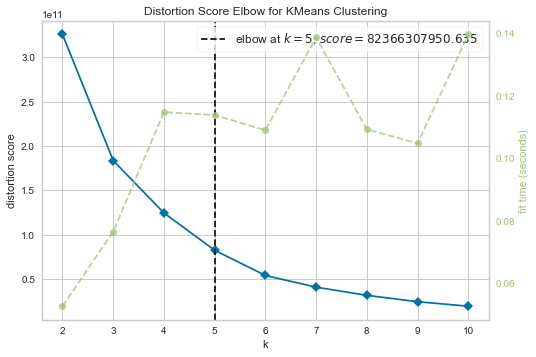

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(df2)
elbow_method.show()
# shows that k=5 is the optimal , but when I did the count of each cluster, last cluster only have 5 datapoint, so I will keep with 4 clusters

In [31]:
model = KMeans(n_clusters=4).fit(df2)
df2['cluster'] = model.predict(df2)+1
df2['cluster'].value_counts()

1    690
2    675
4    458
3    413
Name: cluster, dtype: int64

In [32]:
df['cluster'] = model.predict(df2)+1

In [33]:
pred2 = model.fit_predict(df2)
score2 = silhouette_score(df2, pred2)
score2

0.523887197403206

In [34]:
# to complete the csv for visualisation by adding the col of cluster
#visu = pd.read_csv('/Users/carrie/IronHack/Final_Project/Visualisation/data_clean_visu.csv').iloc[:,1:]
#visu

In [35]:
#visu['Clusters'] = model.predict(df2)+1

In [36]:
#visu['HasChildren'] = (visu['Children'] >= 1).astype('int64')

In [37]:
#visu['HasChildren'] = visu['HasChildren'].replace(0, 'no')
#visu['HasChildren'] = visu['HasChildren'].replace(1, 'yes')
#visu['HasChildren'].value_counts()

In [38]:
#visu.to_csv('/Users/carrie/IronHack/Final_Project/Visualisation/data_clean_visu_with_cluster.csv')

### PCA feature selection & visualisation of clusters

In [39]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df2)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=['pca1','pca2'])
pca_df

pca1        pca2
0      6196.752581 -952.059979
1     -5639.684214  526.060051
2     19643.121783  309.486079
3    -25330.448113   -5.917676
4      6316.791119  392.114963
...            ...         ...
2231   9272.743270 -589.410948
2232  12038.125106  434.397235
2233   5032.010800 -705.922747
2234  17278.012224  171.450789
2235    887.563090  522.877676

[2236 rows x 2 columns]

In [40]:
pca.explained_variance_ratio_.sum()

0.9999075383254407

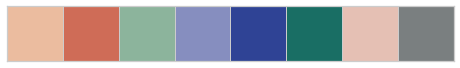

In [41]:
my_color = sns.color_palette(['#ebbc9f', '#cf6c57', '#8cb49c','#868ebf','#2f4395','#196e64','#e5c0b4','#7a7f80'])
sns.palplot(my_color)
plt.show()

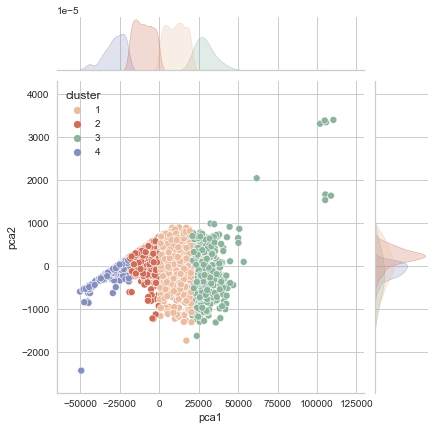

In [42]:
labels = df2['cluster']

sns.jointplot(data=pca_df, x='pca1', y='pca2', hue=labels,palette=my_color[:4])

In [43]:
pca2 = PCA(n_components=3)
pca_data2 = pca2.fit_transform(df2)
pca_df2 = pd.DataFrame.from_records(data=pca_data2, columns=['pca1','pca2','pca3'])
pca_df2

pca1        pca2        pca3
0      6196.752581 -952.059979  232.641166
1     -5639.684214  526.060051  -14.201246
2     19643.121783  309.486079 -108.993049
3    -25330.448113   -5.917676   40.082898
4      6316.791119  392.114963   11.529590
...            ...         ...         ...
2231   9272.743270 -589.410948 -134.272126
2232  12038.125106  434.397235 -227.045179
2233   5032.010800 -705.922747 -273.823415
2234  17278.012224  171.450789  -37.253521
2235    887.563090  522.877676  -11.923229

[2236 rows x 3 columns]

In [44]:
import plotly.io as pio

# naming a layout theme for future reference
pio.templates["jolijoli"] = go.layout.Template(
    layout_colorway=['#ebbc9f', '#cf6c57', '#8cb49c','#868ebf','#2f4395','#196e64','#e5c0b4','#7a7f80'])

# setting Google color palette as default
pio.templates.default = "jolijoli"

In [45]:
pio.templates.default = "jolijoli"
fig = px.scatter_3d(df2, x=pca_df2['pca1'], y=pca_df2['pca2'], z=pca_df2['pca3'], color=df2['cluster'], width=800, height=800)
fig.show()

### Clsutering using Agglomerative Clustering

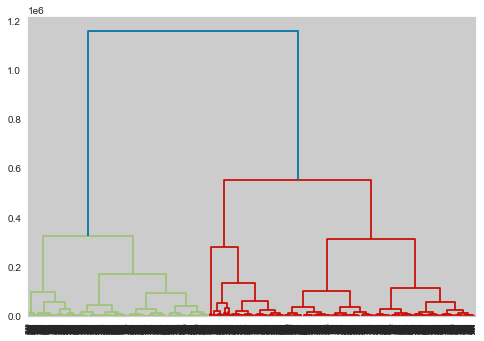

In [46]:

dendrogram = sch.dendrogram(sch.linkage(df2, method='ward'))

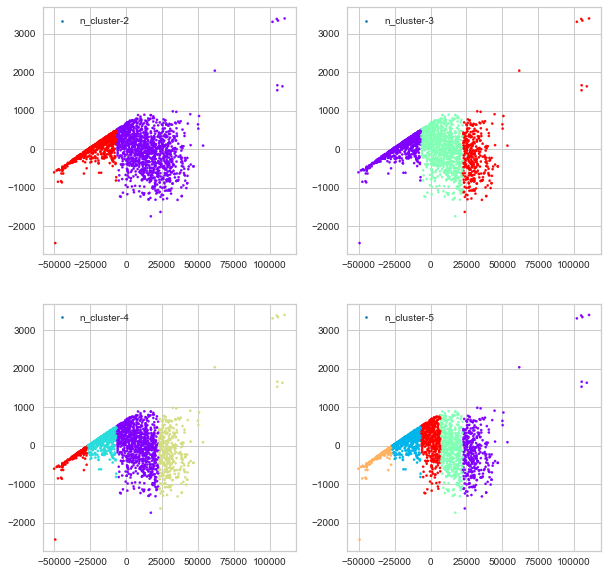

In [47]:
f = plt.figure(figsize=(10,10))
f.add_subplot(2, 2, 1)

for i in range(2, 6):
     aggloclust=AgglomerativeClustering(n_clusters=i).fit(df2)
     f.add_subplot(2, 2, i-1)
     plt.scatter(pca_df2['pca1'], pca_df2['pca2'], s=5, c=aggloclust.labels_, label="n_cluster-"+str(i),cmap='rainbow')
     plt.legend()
plt.show()

In [48]:
model_ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_ac.fit(df2)
labels_ac = model_ac.labels_
labels_ac

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
unique, counts = np.unique(labels_ac, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 956]
 [  1 668]
 [  2 369]
 [  3 243]]


In [50]:
metrics.silhouette_score(df2, model_ac.labels_)

0.4861102401354664

In [51]:
df['cluster_2_ac'] = labels_ac+1

In [52]:
df2['cluster_2_ac'] = labels_ac+1

fig = px.scatter(df2, x=pca_df2['pca1'], y=pca_df2['pca3'], color=df2['cluster_2_ac'], width=800, height=800, color_discrete_sequence=['#ebbc9f', '#cf6c57', '#8cb49c','#868ebf'])
fig.show()

In [53]:
df2.corr().iloc[:,-2:].sort_values('cluster_2_ac',ascending = False)

cluster  cluster_2_ac
cluster_2_ac            0.802523      1.000000
cluster                 1.000000      0.802523
Response                0.059426      0.095519
Meat                   -0.058324      0.064344
NumWebVisitsMonth       0.158033      0.061749
Education               0.058590      0.045705
Complain                0.005499      0.013621
Recency_(days)         -0.003972      0.012461
Sweets                 -0.083181      0.008827
Marital_Status          0.021777      0.007015
Fish                   -0.090294      0.001440
Fruits                 -0.094223     -0.004483
Client_since_(month)   -0.015861     -0.008582
Catalog_Deal           -0.180614     -0.053792
Spending               -0.214807     -0.070230
Gold                   -0.207954     -0.125096
Wines                  -0.276842     -0.150161
Children               -0.116616     -0.183814
Age                    -0.226864     -0.219121
Total_Deal_nondiscount -0.386942     -0.243423
Yearly_Income          -0.390899     -0.248597
Store_Deal             -0.381270     -0.262485
Web_Deal               -0.367223     -0.267480

In [54]:
fig = px.scatter_3d(df2, x=df2['Total_Deal_nondiscount'], y=df2['Spending'], z=df2['Yearly_Income'], color=df2['cluster_2_ac'], width=800, height=800)
fig.show()

In [55]:
fig = px.scatter(df2, x=df2['Yearly_Income'], y=df2['Spending'], color=df2['cluster_2_ac'], width=800, height=800,color_discrete_sequence=['#ebbc9f', '#cf6c57', '#8cb49c','#868ebf'])
fig.show()

#### GMM

In [56]:
for i in range(3,9):
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm.fit(df2)
    print(f'num of cluster: {i}, score: {silhouette_score(df2, gmm.predict(df2))}')

num of cluster: 3, score: 0.22951986912113775
num of cluster: 4, score: 0.5241099082774935
num of cluster: 5, score: 0.31176001843085455
num of cluster: 6, score: 0.31815890928116614
num of cluster: 7, score: 0.2785522584134354
num of cluster: 8, score: 0.2522826961741523


In [57]:
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(df2)

labels_gmm = gmm.predict(df2)

df['cluster_gmm'] = labels_gmm
df['cluster_gmm'].value_counts()

3    690
0    675
2    458
1    413
Name: cluster_gmm, dtype: int64

#### DBSCAN

In [58]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df2)
distances, indices = nbrs.kneighbors(df2)

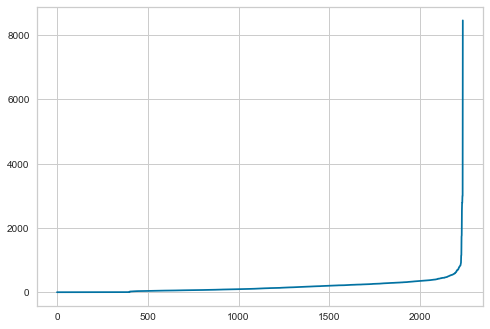

In [59]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

(200.0, 1000.0)

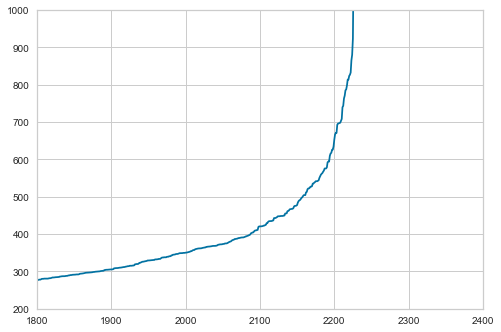

In [60]:
distances, indices = nbrs.kneighbors(df2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim([1800, 2400])
plt.ylim([200, 1000])

In [61]:
for i in range(2,8):
    m = DBSCAN(eps=850, min_samples=i)
    print(f'num of cluster: {i}, score: {silhouette_score(df2, m.fit_predict(df2))}')

num of cluster: 2, score: 0.0604564896512722
num of cluster: 3, score: 0.058071673702097655
num of cluster: 4, score: 0.057720462835863684
num of cluster: 5, score: 0.054716141604054136
num of cluster: 6, score: 0.0038121444204957983
num of cluster: 7, score: 0.028903847386816988


In [62]:
lst = [['KMeans','4', 0.524], ['Agglomerative Clustering', '4', 0.486],
       ['Gaussian Mixture', '4', 0.524], ['DBSCAN', '3', 0.058]]
    
models_results = pd.DataFrame(lst, columns =['Model', 'No. of Clusters', 'Silhouette Score'], dtype = float)
models_results['No. of Clusters']=models_results['No. of Clusters'].astype(int)
models_results

Model  No. of Clusters  Silhouette Score
0                    KMeans                4             0.524
1  Agglomerative Clustering                4             0.486
2          Gaussian Mixture                4             0.524
3                    DBSCAN                3             0.058

#### KMeans have a better silouette score at 0.524, so KMeans clustter is better, I will find the pattern for each cluster for KMeans 

### Find cluster pattern: Clusters_2_KMeans analysis

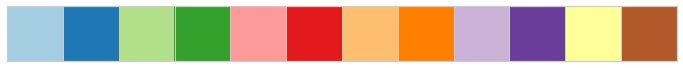

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns
current_palette = sns.color_palette('Paired')
sns.palplot(current_palette)
plt.show()

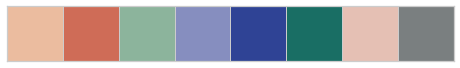

In [64]:
my_color = sns.color_palette(['#ebbc9f', '#cf6c57','#8cb49c','#868ebf', '#2f4395','#196e64','#e5c0b4','#7a7f80'])
sns.palplot(my_color)
plt.show()

In [65]:
df2['cluster'].value_counts()

1    690
2    675
4    458
3    413
Name: cluster, dtype: int64

In [66]:
fig = px.pie(df2['cluster'].value_counts().reset_index(), values = 'cluster', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#ebbc9f', '#cf6c57', '#2f4395','#196e64'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Clients: %{value}')

fig.update_layout(annotations = [dict(text = 'Number of customers <br>by cluster', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

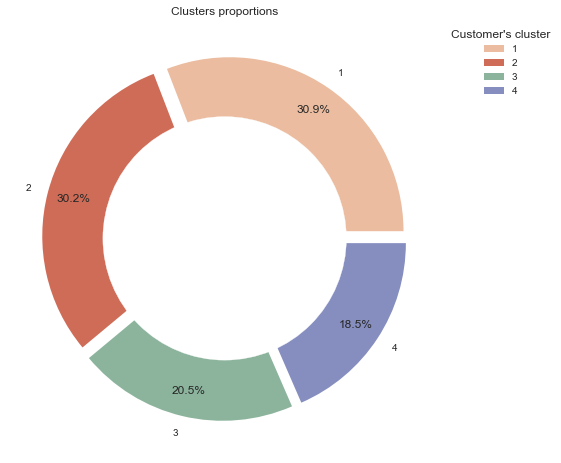

In [67]:
sizes = dict(df2['cluster'].value_counts())

explodes= (0.05,0.05,0.05,0.05)


plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, colors=my_color,explode = explodes)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [68]:
df2.columns

Index(['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web_Deal',
       'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth', 'Complain',
       'Response', 'Age', 'Client_since_(month)', 'Spending',
       'Total_Deal_nondiscount', 'Children', 'cluster', 'cluster_2_ac'],
      dtype='object')

In [69]:
df2['MntTotal'] = df2['Wines']+df2['Meat']+df2['Fruits']+df2['Fish']+df2['Sweets']+df2['Gold']

In [70]:
df2 = df2.assign(
        percentWines=lambda x: x['Wines'] / x['MntTotal'] * 100,
        percentMeat=lambda x: x['Meat'] / x['MntTotal'] * 100,
        percentFruits=lambda x: x['Fruits'] / x['MntTotal'] * 100,
        percentFish=lambda x: x['Fish'] / x['MntTotal'] * 100,
        percentSweets=lambda x: x['Sweets'] / x['MntTotal'] * 100,
        percentGold=lambda x: x['Gold'] / x['MntTotal'] * 100,
)

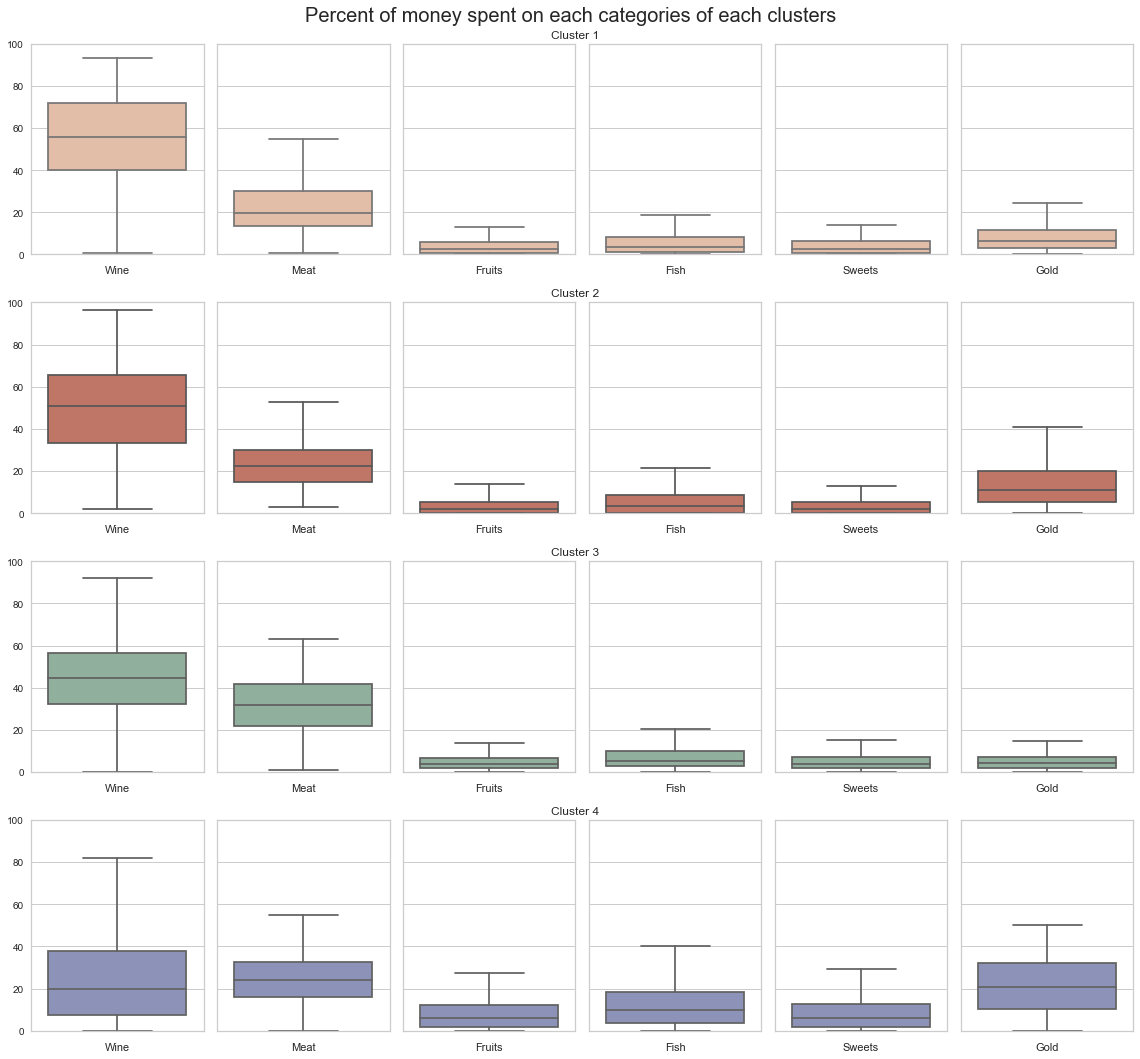

In [103]:
fig, axes = plt.subplots(4, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Percent of money spent on each categories of each clusters', fontsize=20)
PALETTE=my_color

for i, value in enumerate(sorted(df2['cluster'].unique())):
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentWines', showfliers=False, color=PALETTE[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentMeat', showfliers=False, color=PALETTE[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentFruits', showfliers=False, color=PALETTE[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'Cluster {value}', x=1)

    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentFish', showfliers=False, color=PALETTE[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentSweets', showfliers=False, color=PALETTE[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentGold', showfliers=False, color=PALETTE[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()


#### As we see, popular products types are the same in all clusters: wine and meat. But cluster 1 buys Meat more than others. 

#### Cluster 3 spend most in Gold products within 4 clusters

#### Cluster 4, 2, 1 spent quite much in Wine products (propotionally in total spendings)

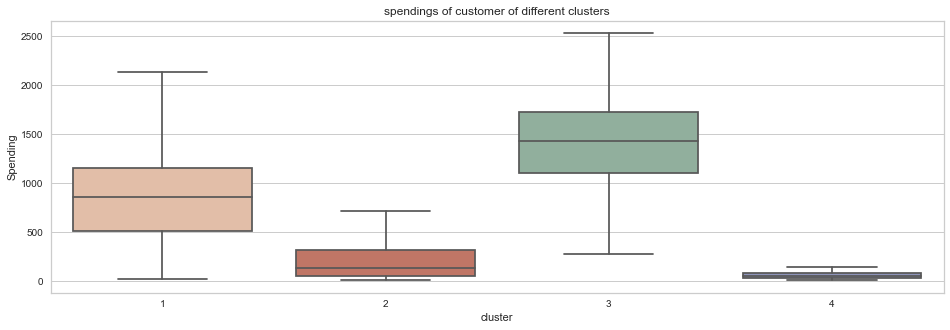

In [104]:
plt.figure(figsize=(16,5))
plt.title(f'spendings of customer of different clusters')
ax = sns.boxplot(data=df2, x='cluster', y='Spending', palette=PALETTE, showfliers=False)
plt.show()

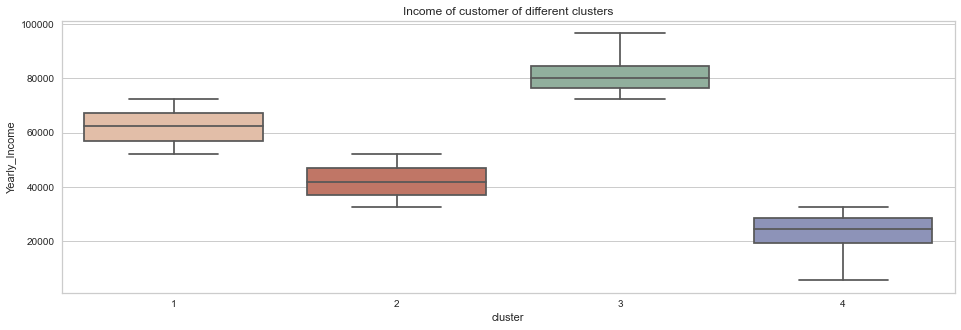

In [105]:
plt.figure(figsize=(16,5))
plt.title(f'Income of customer of different clusters')
ax = sns.boxplot(data=df2, x='cluster', y='Yearly_Income', palette=PALETTE, showfliers=False)
plt.show()

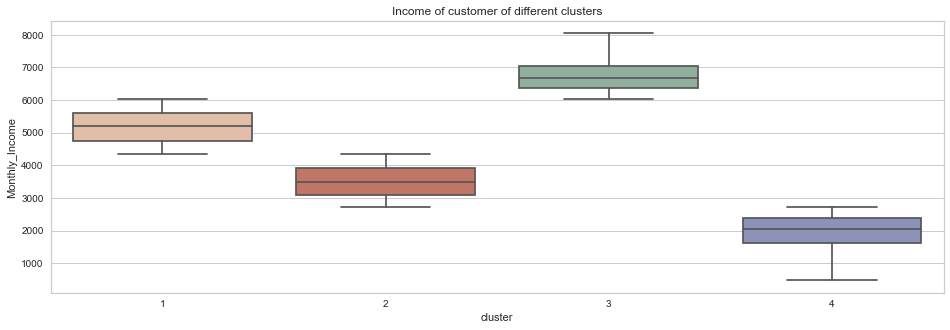

In [102]:
plt.figure(figsize=(16,5))
plt.title(f'Income of customer of different clusters')
ax = sns.boxplot(data=df2, x='cluster', y=df2['Yearly_Income']/12, palette=PALETTE, showfliers=False)
ax.set(ylabel='Monthly_Income')
plt.show()

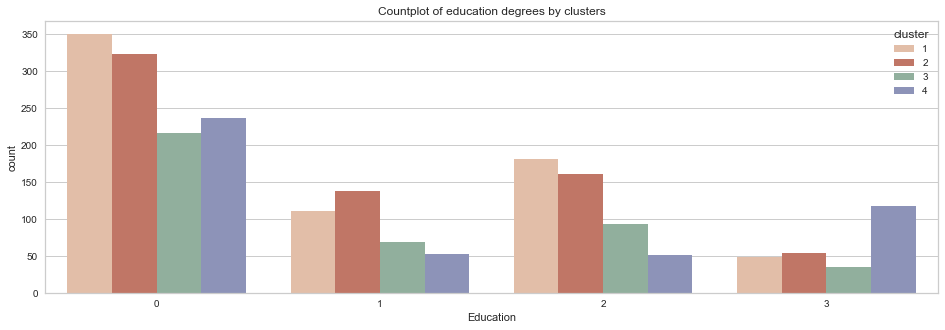

In [106]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df2, x='Education', hue='cluster', palette=PALETTE)
plt.show()
# {'Bachelor': 0, 'Master': 1, 'PhD': 2, 'Undergraduate': 3}

#### there are most undergraduate in cluster 3

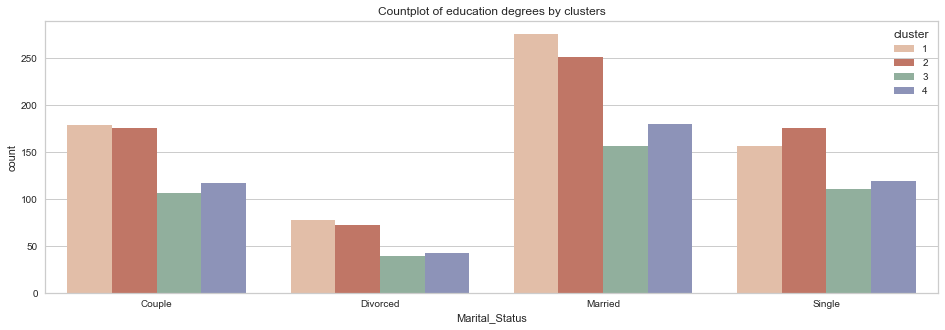

In [75]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df2, x='Marital_Status', hue='cluster', palette=PALETTE)
marital_labels=['Couple','Divorced','Married','Single']
plt.xticks([0,1,2,3],marital_labels)
plt.show()
# {'Couple': 0, 'Divorced': 1, 'Married': 2, 'Single': 3}

#### no obvious pattern in marital status for clusters

In [76]:
df2.Children.value_counts()

1    1125
0     637
2     421
3      53
Name: Children, dtype: int64

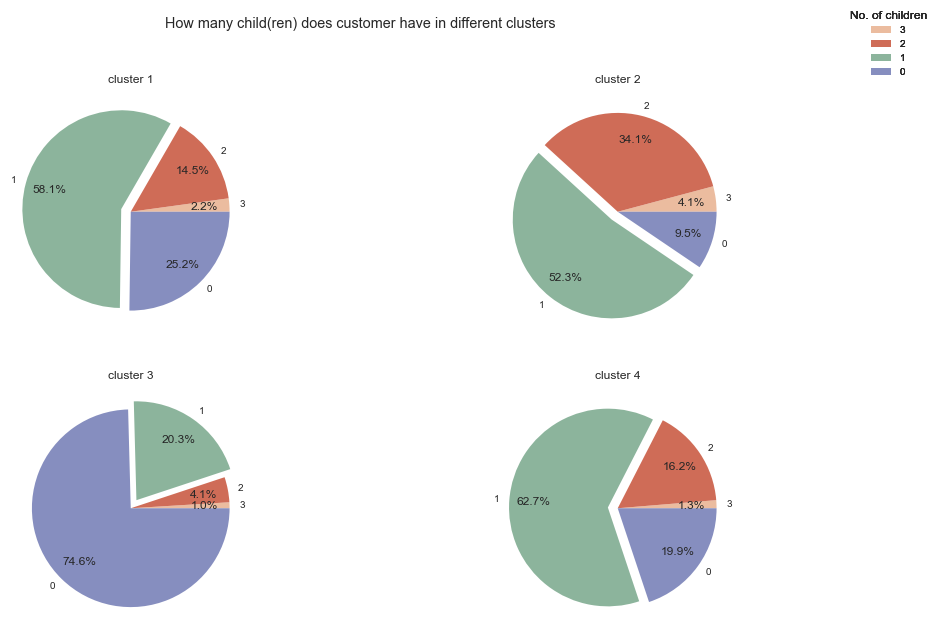

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
Explode = (0., 0., 0.1,0)

for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        sizes = dict(df2.query(f'cluster == {k}')['Children'].value_counts().sort_index(ascending=False))
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), explode=Explode,labels=list(sizes.keys()), autopct="%.1f%%", pctdistance=0.75, colors=PALETTE)
        fig.legend(title="No. of children", labels=['3', '2','1','0'], bbox_to_anchor=(1, 1)) 

fig.suptitle('How many child(ren) does customer have in different clusters')
fig.show()

#### There are mostly parents in 2, 3, 4 clusters. And most customers in 1st cluster have no child

In [78]:
# verify if the gragh is well calculated to avoid any mistake
size_check = dict(df2.query(f'cluster == 4')['Children'].value_counts().sort_index(ascending=False))
size_check

{3: 6, 2: 74, 1: 287, 0: 91}

In [79]:
size_total = sum(size_check.values())
size_total

458

In [80]:
for k,v in size_check.items():
    percent = round((v/size_total)*100,1)
    print(f'{k} child(ren) consist of {percent} % of total in cluster 4')
# the gragh is corresponding to the calculation 

3 child(ren) consist of 1.3 % of total in cluster 4
2 child(ren) consist of 16.2 % of total in cluster 4
1 child(ren) consist of 62.7 % of total in cluster 4
0 child(ren) consist of 19.9 % of total in cluster 4


In [81]:
df2.head()

Education  Marital_Status  Yearly_Income  Recency_(days)  Wines  Fruits  \
0          0               3        58138.0              58    635      88   
1          0               3        46344.0              38     11       1   
2          0               0        71613.0              26    426      49   
3          0               0        26646.0              26     11       4   
4          2               2        58293.0              94    173      43   

   Meat  Fish  Sweets  Gold  Web_Deal  Catalog_Deal  Store_Deal  \
0   546   172      88    88         8            10           4   
1     6     2       1     6         1             1           2   
2   127   111      21    42         8             2          10   
3    20    10       3     5         2             0           4   
4   118    46      27    15         5             3           6   

   NumWebVisitsMonth  Complain  Response  Age  Client_since_(month)  Spending  \
0                  7         0         1   57                  33.2      1617   
1                  5         0         0   60                   5.0        27   
2                  4         0         0   49                  16.6       776   
3                  6         0         0   30                   3.0        53   
4                  5         0         0   33                  11.5       422   

   Total_Deal_nondiscount  Children  cluster  cluster_2_ac  MntTotal  \
0                      22         0        1             1      1617   
1                       4         2        2             1        27   
2                      20         0        1             1       776   
3                       6         1        4             2        53   
4                      14         1        1             1       422   

   percentWines  percentMeat  percentFruits  percentFish  percentSweets  \
0     39.270254    33.766234       5.442177    10.636982       5.442177   
1     40.740741    22.222222       3.703704     7.407407       3.703704   
2     54.896907    16.365979       6.314433    14.304124       2.706186   
3     20.754717    37.735849       7.547170    18.867925       5.660377   
4     40.995261    27.962085      10.189573    10.900474       6.398104   

   percentGold  
0     5.442177  
1    22.222222  
2     5.412371  
3     9.433962  
4     3.554502

In [82]:
df2.filter(regex='_Deal$',axis=1).sum(axis=0)

Web_Deal         9140
Catalog_Deal     5955
Store_Deal      12959
dtype: int64

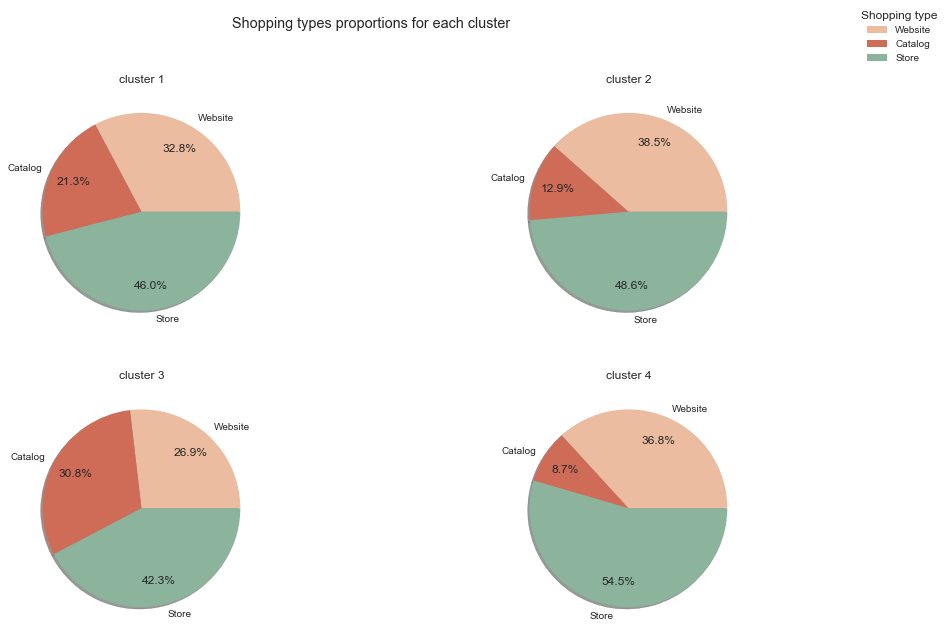

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = df2.query(f'cluster == {k}').filter(regex='_Deal$',axis=1).sum(axis=0)
        sizes = dict(num)
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Shopping types proportions for each cluster')
fig.legend(title="Shopping type", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1)) 
fig.show()


#### most people in each clusters buy from store. Customers from 1st and 2nd clusters buy from catalog more than from 1 and 4 clusters. 

#### Maybe catalog products are more expensive, if want to do campaigne about catalogue products, better to target 1st and 2nd clusters customers

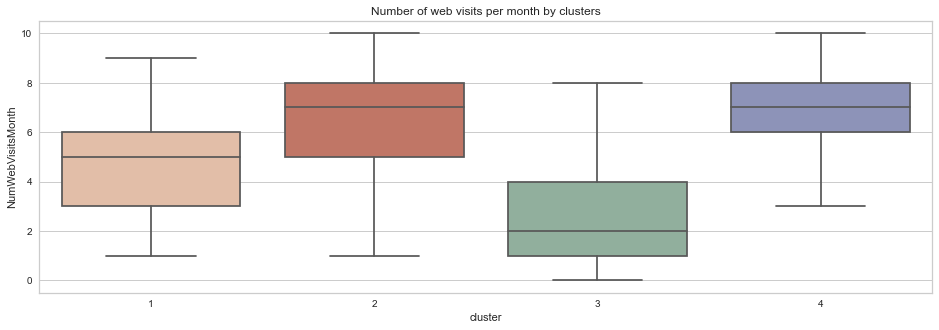

In [84]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits per month by clusters')
ax = sns.boxplot(data=df2, x='cluster', y='NumWebVisitsMonth', palette=PALETTE, showfliers=False)
plt.show()

#### 2nd and 3rd clusters visits the website the most, will be good to target them in website campaignes

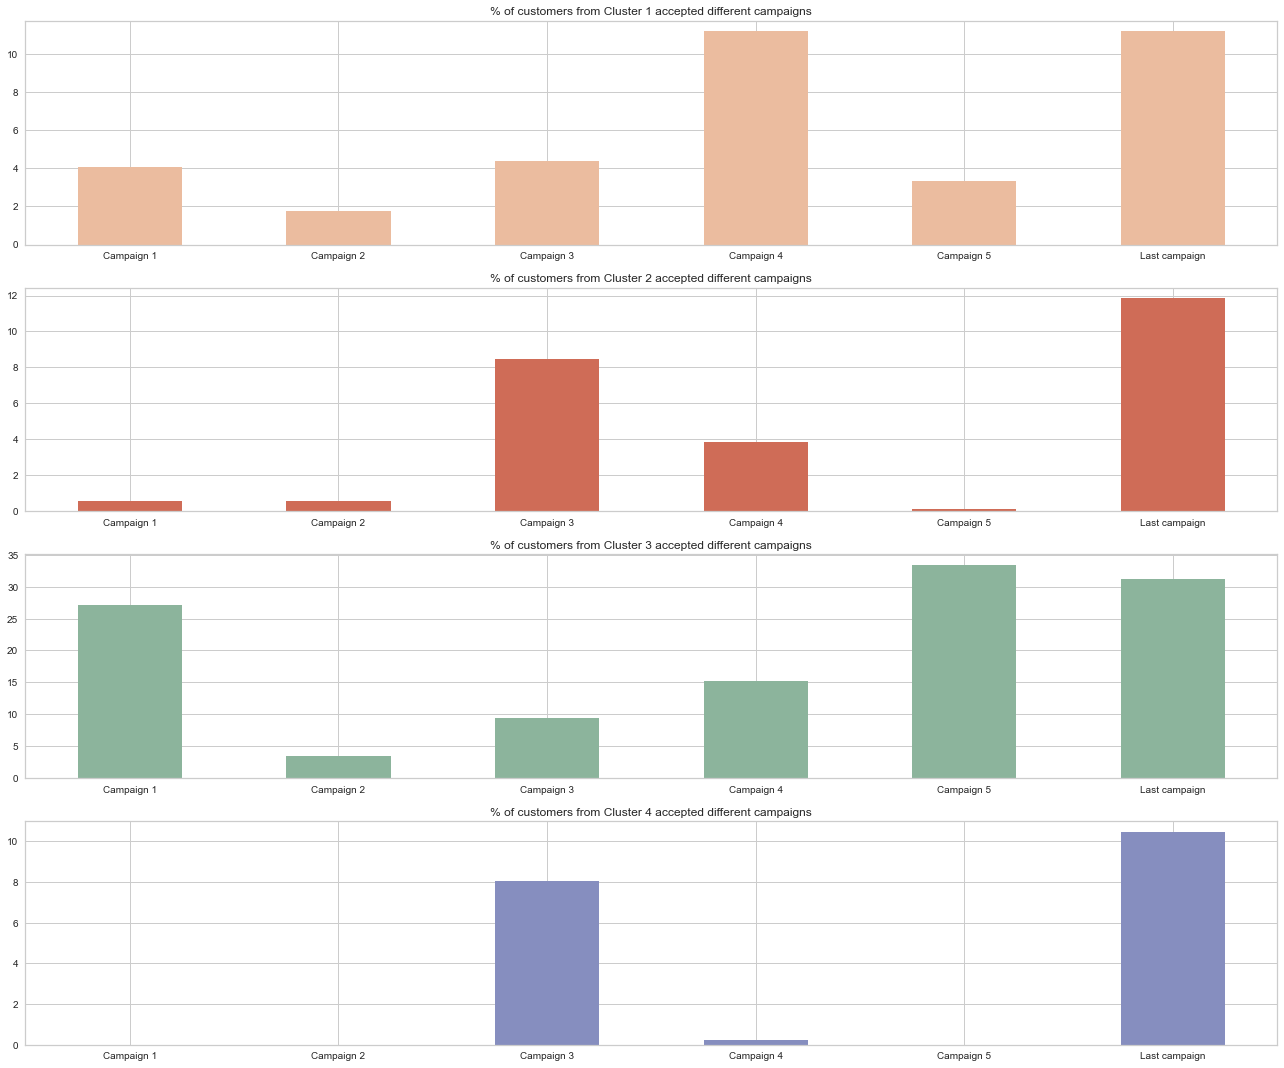

In [85]:
fig, axes = plt.subplots(4, 1, figsize=(16, 20))

for i in range(1, 5):
    ax = (df.query(f'cluster == {i}')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
          .sum() 
          .divide(df.query(f'cluster == {i}').shape[0]).multiply(100)
          .plot(kind='bar', figsize=(18,15), title=f'% of customers from Cluster {i} accepted different campaigns', ax=axes[i-1], color=PALETTE[i-1]))
    ax.set_xticklabels(['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last campaign'], rotation=0)
    
plt.tight_layout()

#### Campaign wise:
The biggest interest in campaign 1: Cluster 2 \
Campaign 2 acceptance in relatively low in any cluster\
The biggest interest in campaign 3 showed Cluster 1 & 3\
Campaign 4 was relatively successful in all clusters besides Cluster 3\
The biggest interest in campaign 5 showed Cluster 2\
The last campaign was succesfull in all clusters

#### Cluster wise:
cluster 2 & 4 accepted more campaignes than other 2 clusters

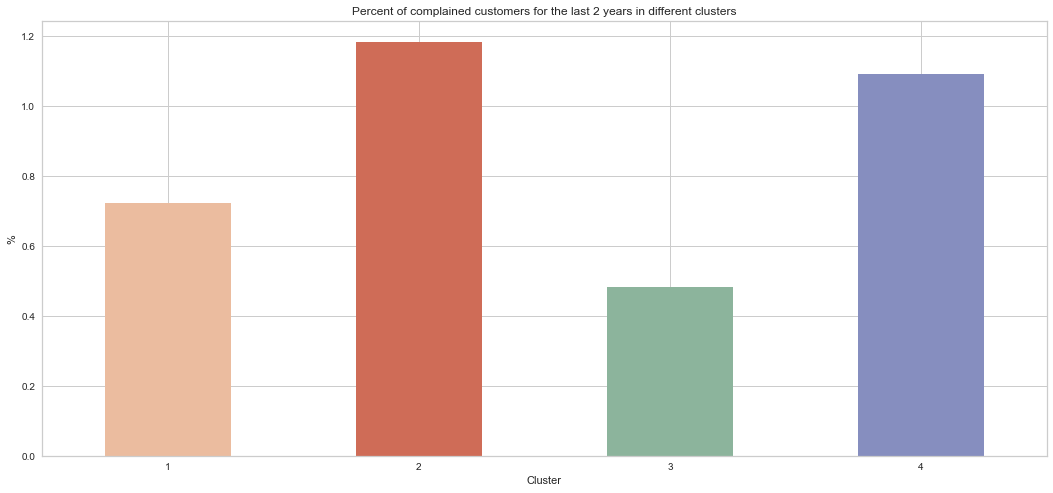

In [86]:
complains_by_cluster = (df2.groupby(by='cluster')['Complain'].sum()
                                      .divide(df2['cluster'].value_counts())
                                      .multiply(100))

ax = complains_by_cluster.plot(kind='bar', figsize=(18, 8), color=PALETTE[:4], 
                               title='Percent of complained customers for the last 2 years in different clusters',
                               ylabel='%', xlabel='Cluster')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

#### cluster 3 spent the least, but they has the 2nd most complaints

In [87]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 55, 80]
df2['Age_group'] = pd.cut(df2['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Recency = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
df2['Income_group'] = pd.qcut(df2['Recency_(days)'], q=4, labels=cut_labels_Recency)
#Create Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
df2['Seniority_group'] = pd.qcut(df2['Client_since_(month)'], q=4, labels=cut_labels_Seniority)

In [88]:
cut_labels_Recency = ['Low spending', 'Low to medium spending', 'Medium to high spending', 'High spending']
df2['Spending_group'] = pd.qcut(df2['Spending'], q=4, labels=cut_labels_Recency)

In [89]:
df2[['Age_group','Recency_group','Seniority_group','Spending_group']]

KeyError: "['Recency_group'] not in index"

In [107]:
df2.query(f'cluster == 3')['Age_group'].value_counts()

Adult     152
Senior    119
Mature     87
Young      55
Name: Age_group, dtype: int64

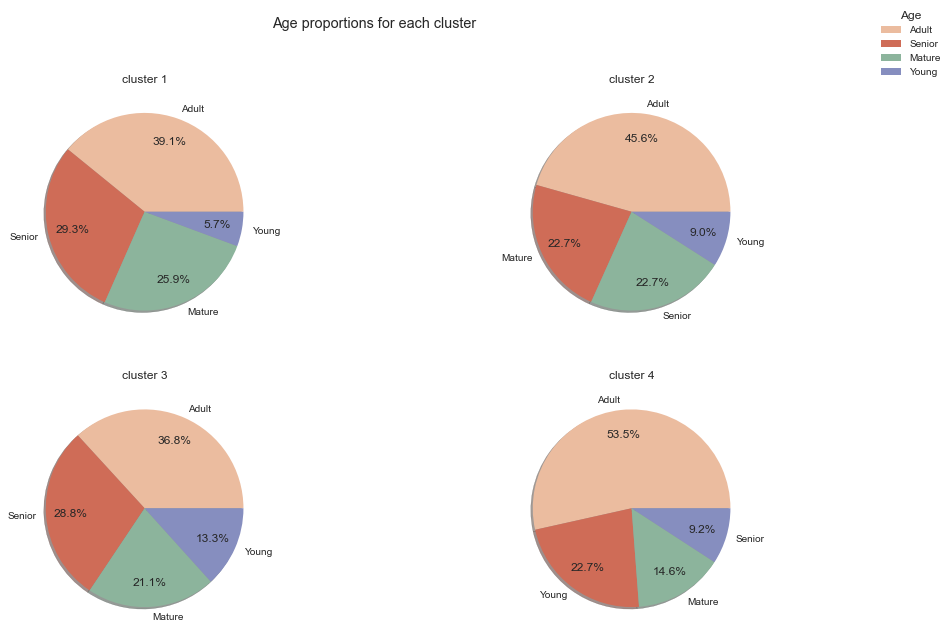

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = df2.query(f'cluster == {k}')['Age_group'].value_counts()
        sizes = dict(num)
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), labels=num.index, autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Age proportions for each cluster')
fig.legend(title="Age", labels=['Adult', 'Senior', 'Mature','Young'], bbox_to_anchor=(1, 1)) 
fig.show()

In [109]:
df2.query(f'cluster == 4')['Income_group'].value_counts()

Low income               121
High income              121
Low to medium income     119
Medium to high income     97
Name: Income_group, dtype: int64

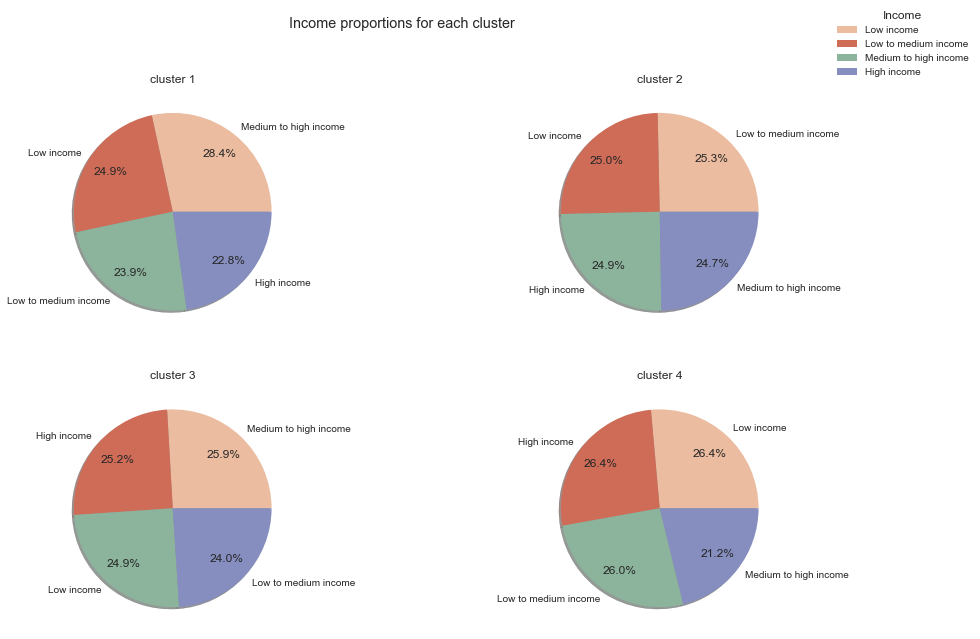

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = df2.query(f'cluster == {k}')['Income_group'].value_counts()
        sizes = dict(num)
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), labels=num.index, autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Income proportions for each cluster')
fig.legend(title="Income", labels=['Low income', 'Low to medium income', 'Medium to high income', 'High income'], bbox_to_anchor=(1, 1)) 
fig.show()

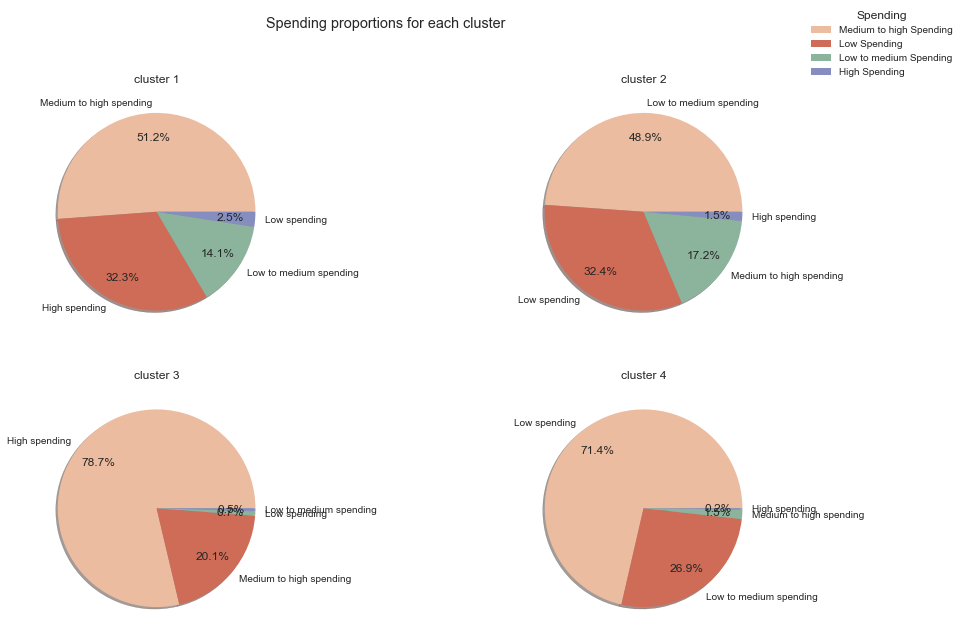

In [111]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = df2.query(f'cluster == {k}')['Spending_group'].value_counts()
        sizes = dict(num)
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), labels=num.index, autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=my_color)

fig.suptitle('Spending proportions for each cluster')
fig.legend(title="Spending", labels=['Medium to high Spending', 'Low Spending', 'Low to medium Spending','High Spending'], bbox_to_anchor=(1, 1)) 
fig.show()

In [112]:
df2.query(f'cluster == 4')['Seniority_group'].value_counts()

Old customers            123
New customers            114
Experienced customers    114
Discovering customers    107
Name: Seniority_group, dtype: int64

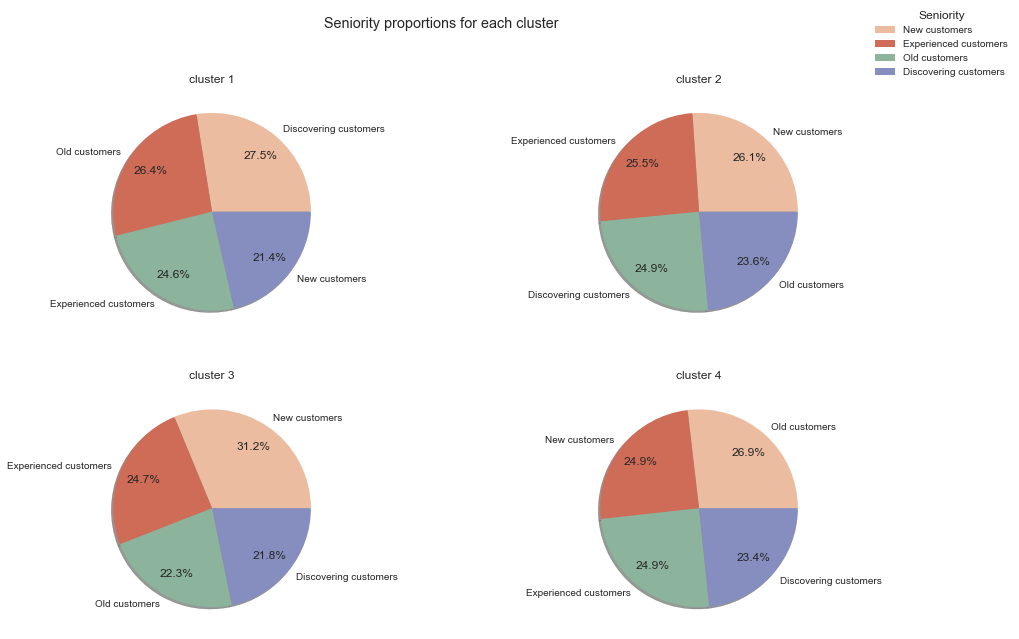

In [113]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = df2.query(f'cluster == {k}')['Seniority_group'].value_counts()
        sizes = dict(num)
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), labels=num.index, autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Seniority proportions for each cluster')
fig.legend(title="Seniority", labels=['New customers', 'Experienced customers', 'Old customers','Discovering customers'], bbox_to_anchor=(1, 1)) 
fig.show()

### check for scalling

In [ ]:
df3 = scaled_data[['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 
       'Web_Deal', 'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Client_since_(month)',
       'Spending', 'Total_Deal_nondiscount', 'Children']]
df3

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(scaled_data)
elbow_method.show()

In [ ]:
model3 = KMeans(n_clusters=5).fit(scaled_data)
scaled_data['cluster_3'] = model3.predict(scaled_data)+1
scaled_data['cluster_3'].value_counts()

In [ ]:
pred3 = model3.fit_predict(scaled_data)

score3 = silhouette_score(scaled_data, pred3)
score3

In [ ]:
# the scaled data is not very ideal, so we are not gonna scale it

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df3)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=['pca1','pca2'])
pca_df

In [ ]:
labels = df['cluster']
sns.jointplot(data=pca_df, x='pca1', y='pca2', hue=labels,palette=PALETTE[:4])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
normalized_dataset = scaler.transform(data)

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(normalized_dataset)
elbow_method.show()

In [ ]:
model4 = KMeans(n_clusters=4).fit(normalized_dataset)
scaled_data['cluster_4'] = model4.predict(normalized_dataset)+1
scaled_data['cluster_4'].value_counts()

In [ ]:
pred4 = model4.fit_predict(normalized_dataset)

score4 = silhouette_score(normalized_dataset, pred4)
score4

In [ ]:
labels = scaled_data['cluster_4']
sns.jointplot(data=pca_df, x='pca1', y='pca2', hue=labels,palette=PALETTE[:4])

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(data)
robust_df = pd.DataFrame(robust_df, columns =data.columns)
robust_df

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(robust_df)
elbow_method.show()

In [ ]:
model5 = KMeans(n_clusters=4).fit(normalized_dataset)
scaled_data['cluster_5'] = model5.predict(robust_df)+1
scaled_data['cluster_5'].value_counts()

In [ ]:
pred5 = model5.fit_predict(robust_df)
score5 = silhouette_score(robust_df, pred5)
score5